# 2.1.2 Directed search: Generating alternatives

In this file the MOEA optimization algorithm is used to search through the lever space of the model in order to find promising policies (candidate strategies) to reach the defined objectives. The objectives are defined in problem_formulation.py and all aim to minimize the specified outcomes. The reference scenario is defined based on the open exploration and represents a "worst-case" scenario. This scenario, model initialisation, and data generation is done in the dike_model_optimization.py file.

The model simulation uses the $\epsilon$-NSGA2 algorithm and 10000 nfes. The epsilons are set to a list of length equal to the number of outcomes: *[1e3] * len(model.outcomes)*. The convergence of the model is tracked with epsilon progress.

This notebook has the following structure:
1. Importing generated model files
2. Assessing convergence of the algorithm
3. Parallel coordinate plot of original results
4. Filtering results for policies of interest
5. Parallel coordinate plot of policies of interest

**nog uitleggen wat het reference scenario dan is? Ook uitleggen dat platypus is gebruikt? Aanvullen van gebruik van pareto?
Structuur van notebook aangeven**

Determining worst case scenario:
The coding below has been used to create a worst case scenario. The uncertainty values of this worst case scenario will be used as reference case in the further steps of the MORDM. The worst case scenario has been defined as the scenario with the highest amount of expected deaths and highest expected annual damage.

In [22]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis import prim
from ema_workbench.analysis import dimensional_stacking
from ema_workbench.analysis import parcoords
from ema_workbench.em_framework import get_SALib_problem
from problem_formulation import get_model_for_problem_formulation


In [7]:
# Define problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(2)

### Selecting worst case scenario

In [2]:
#Importing worst case scenarios
experiments_zero = pd.read_csv('data/output_data/OE_experiments_zero.csv')
outcomes_zero = pd.read_csv('data/output_data/OE_outcomes_zero.csv')

#experiments = experiments.drop(columns='Unnamed: 0')
#outcomes_zero = outcomes_zero.drop(columns='Unnamed: 0')
outcomes_zero

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
0,0,3.215190e+09,0,0.0,0.0,2.150788,policy zero
1,1,3.951166e+08,0,0.0,0.0,0.622800,policy zero
2,2,1.734157e+09,0,0.0,0.0,3.655814,policy zero
3,3,1.100096e+09,0,0.0,0.0,1.004233,policy zero
4,4,2.280704e+09,0,0.0,0.0,1.928266,policy zero
...,...,...,...,...,...,...,...
19995,19995,2.733380e+09,0,0.0,0.0,1.966356,policy zero
19996,19996,2.644166e+09,0,0.0,0.0,1.930990,policy zero
19997,19997,3.320982e+08,0,0.0,0.0,0.325153,policy zero
19998,19998,3.714786e+09,0,0.0,0.0,2.288225,policy zero


In [3]:
experiments_zero

,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0,127,77.463054,1.0,0.217956,42.793876,10.0,0.822083,275.127549,1.0,...,0,0,0,0,0,0,0,0,policy zero,dikesnet
1,1,113,328.954122,10.0,0.855878,288.651748,10.0,0.455687,63.374586,10.0,...,0,0,0,0,0,0,0,1,policy zero,dikesnet
2,2,98,124.804496,1.0,0.765119,168.360708,10.0,0.887798,159.925848,10.0,...,0,0,0,0,0,0,0,2,policy zero,dikesnet
3,3,22,306.932848,1.0,0.871090,180.262572,1.0,0.066810,138.197589,1.5,...,0,0,0,0,0,0,0,3,policy zero,dikesnet
4,4,57,302.082680,10.0,0.052471,54.446790,1.5,0.729364,304.651556,1.5,...,0,0,0,0,0,0,0,4,policy zero,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,84,99.856962,10.0,0.224369,120.578027,10.0,0.377203,209.939302,10.0,...,0,0,0,0,0,0,0,19995,policy zero,dikesnet
19996,19996,94,159.117246,1.0,0.018705,343.016746,1.5,0.569659,207.583624,1.5,...,0,0,0,0,0,0,0,19996,policy zero,dikesnet
19997,19997,18,67.483359,1.0,0.544223,41.627716,1.0,0.503882,330.005059,10.0,...,0,0,0,0,0,0,0,19997,policy zero,dikesnet
19998,19998,82,296.528878,1.0,0.006326,89.893624,1.5,0.959538,155.041574,1.0,...,0,0,0,0,0,0,0,19998,policy zero,dikesnet


In [4]:
# As a first step, the scenarios that belong to the worst 10% of both objectives are selected
select_worst_outcomes = outcomes_zero[(outcomes_zero['Expected Annual Damage']  > np.percentile(outcomes_zero['Expected Annual Damage'],90)) &
                                      (outcomes_zero['Expected Number of Deaths']  > np.percentile(outcomes_zero['Expected Number of Deaths'],90))]
select_worst_outcomes

,Unnamed: 0,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy
33,33,5.198803e+09,0,0.0,0.0,4.890480,policy zero
100,100,5.136015e+09,0,0.0,0.0,5.339259,policy zero
121,121,4.691483e+09,0,0.0,0.0,3.791816,policy zero
122,122,6.017659e+09,0,0.0,0.0,5.027354,policy zero
143,143,3.513066e+09,0,0.0,0.0,3.831034,policy zero
...,...,...,...,...,...,...,...
19877,19877,3.589782e+09,0,0.0,0.0,4.150495,policy zero
19892,19892,4.561513e+09,0,0.0,0.0,3.754350,policy zero
19901,19901,6.247524e+09,0,0.0,0.0,5.502276,policy zero
19957,19957,4.781189e+09,0,0.0,0.0,4.949853,policy zero


In [9]:
# In order to match the outcomes with their uncertainty values the uncertainty columns are merged with the selected worst case outcomes
combined_worstoutcomes_experiments = pd.merge(select_worst_outcomes , experiments_zero , left_index=True, right_index=True)
combined_worstoutcomes_experiments

,Unnamed: 0_x,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy_x,Unnamed: 0_y,A.0_ID flood wave shape,A.1_Bmax,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy_y,model
33,33,5.198803e+09,0,0.0,0.0,4.890480,policy zero,33,122,239.775123,...,0,0,0,0,0,0,0,33,policy zero,dikesnet
100,100,5.136015e+09,0,0.0,0.0,5.339259,policy zero,100,32,72.211418,...,0,0,0,0,0,0,0,100,policy zero,dikesnet
121,121,4.691483e+09,0,0.0,0.0,3.791816,policy zero,121,60,259.026989,...,0,0,0,0,0,0,0,121,policy zero,dikesnet
122,122,6.017659e+09,0,0.0,0.0,5.027354,policy zero,122,25,92.355456,...,0,0,0,0,0,0,0,122,policy zero,dikesnet
143,143,3.513066e+09,0,0.0,0.0,3.831034,policy zero,143,36,58.864500,...,0,0,0,0,0,0,0,143,policy zero,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19877,19877,3.589782e+09,0,0.0,0.0,4.150495,policy zero,19877,122,165.691131,...,0,0,0,0,0,0,0,19877,policy zero,dikesnet
19892,19892,4.561513e+09,0,0.0,0.0,3.754350,policy zero,19892,86,65.839737,...,0,0,0,0,0,0,0,19892,policy zero,dikesnet
19901,19901,6.247524e+09,0,0.0,0.0,5.502276,policy zero,19901,72,293.628058,...,0,0,0,0,0,0,0,19901,policy zero,dikesnet
19957,19957,4.781189e+09,0,0.0,0.0,4.949853,policy zero,19957,102,176.419188,...,0,0,0,0,0,0,0,19957,policy zero,dikesnet


In [10]:
combined_worstoutcomes_experiments.sort_values(by=['Expected Number of Deaths','Expected Annual Damage'],ascending =False)

,Unnamed: 0_x,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,policy_x,Unnamed: 0_y,A.0_ID flood wave shape,A.1_Bmax,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy_y,model
16076,16076,5.684293e+09,0,0.0,0.0,6.090304,policy zero,16076,104,107.338439,...,0,0,0,0,0,0,0,16076,policy zero,dikesnet
547,547,5.294605e+09,0,0.0,0.0,6.030020,policy zero,547,78,74.599284,...,0,0,0,0,0,0,0,547,policy zero,dikesnet
16620,16620,4.322621e+09,0,0.0,0.0,5.988701,policy zero,16620,121,41.863103,...,0,0,0,0,0,0,0,16620,policy zero,dikesnet
14173,14173,5.439709e+09,0,0.0,0.0,5.971139,policy zero,14173,70,165.830966,...,0,0,0,0,0,0,0,14173,policy zero,dikesnet
745,745,4.658382e+09,0,0.0,0.0,5.883481,policy zero,745,126,91.695046,...,0,0,0,0,0,0,0,745,policy zero,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,11943,3.887427e+09,0,0.0,0.0,3.702210,policy zero,11943,36,69.997401,...,0,0,0,0,0,0,0,11943,policy zero,dikesnet
4327,4327,4.576691e+09,0,0.0,0.0,3.698140,policy zero,4327,30,74.337607,...,0,0,0,0,0,0,0,4327,policy zero,dikesnet
11136,11136,3.824903e+09,0,0.0,0.0,3.693429,policy zero,11136,35,299.463710,...,0,0,0,0,0,0,0,11136,policy zero,dikesnet
6989,6989,5.003126e+09,0,0.0,0.0,3.691398,policy zero,6989,60,97.863210,...,0,0,0,0,0,0,0,6989,policy zero,dikesnet


### Select worst case scenario
Select uncertainty with highest expected annual damage and highest number of deaths. Hierbij is het aantal doden belangrijker

Eigenlijk wil je dit volledige scenario gebruiken > dus ingevoegd

> Definities van de verschillende uncertainties goed duidelijk noteren want dan weten we wat er precies wordt bedoeld


> netjes weergeven + juiste dingen printen

Average over all dike rings - does alter results __> NIET NODIG, VOLLEDIGE UNCERTIANTIES OF HET WORST CASE SCENARIO GEBRUIKT
        "Bmax": 112.737, #Per dijkring - breach width
        "Brate": 4.800, #Per dijkring -how fast breach grows over time
        "pfail": 0.294, #Per dijkring - Kans dat dijk niet breekt > kans niet of wel??
        "discount rate 0": 4.5, #Calculating present rate values - time step 1
        "discount rate 1": 3.5, #Calculating present rate values - time step 2
        "discount rate 2": 1.5, #Calculating present rate values - time step 3
        "ID flood wave shape": 104, #Welke flood wave shape wordt gebruikt

In [14]:
combined_worstoutcomes_experiments.loc[16076,'A.0_ID flood wave shape':'A.5_pfail']

A.0_ID flood wave shape           104
A.1_Bmax                   107.338439
A.1_Brate                         1.5
A.1_pfail                    0.327612
A.2_Bmax                     36.22951
A.2_Brate                         1.0
A.2_pfail                    0.067184
A.3_Bmax                    203.73302
A.3_Brate                         1.5
A.3_pfail                    0.099837
A.4_Bmax                    36.591975
A.4_Brate                        10.0
A.4_pfail                    0.957634
A.5_Bmax                     179.7911
A.5_Brate                        10.0
A.5_pfail                    0.017638
Name: 16076, dtype: object

### 1. Importing generated model files
The csv files that were created in dike_model_optimization.py are imported and shortly explored.

UITLEGGEN WAT DIKE_MODEL_OPTIMIZATION DOET!!!! WAT VOOR SOORT RUN IS DAT? EEN VORM VAN OPTIMALISEREN OVER UNCERTAINTIES

In [15]:
# Import CSV files generated in dike_model_optimization
results = pd.read_csv('data/output_data/MOEA_results_10000nfe.csv')
convergence = pd.read_csv('data/output_data/MOEA_convergence_10000nfe.csv')

In [16]:
# Print results
results

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,0,0,1,0,0,0,0,1,1,0,...,2,6,9,0,0,1.252760e+07,3.415027e+08,2.672000e+08,430.301189,0.001806
1,1,0,0,0,0,0,0,1,0,0,...,4,2,10,3,3,3.682104e+05,5.915904e+08,1.519000e+08,29.444865,0.000065
2,2,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.633004e+08,1.110800e+09,0.000000,0.000000
3,3,0,1,1,0,0,0,1,1,1,...,6,5,7,0,1,0.000000e+00,3.245990e+08,6.249000e+08,0.000000,0.000000
4,4,0,1,0,0,1,1,1,1,1,...,6,1,9,0,3,0.000000e+00,2.959953e+08,8.547000e+08,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,0,0,0,0,0,0,0,0,0,...,0,0,7,0,0,2.130889e+07,2.400674e+08,2.424000e+08,670.530947,0.007577
276,276,1,0,0,0,0,0,1,1,0,...,3,2,7,0,0,6.250959e+08,1.403299e+08,1.460000e+08,18580.030101,0.202364
277,277,1,1,0,0,0,0,1,0,1,...,0,2,5,3,0,2.834672e+07,1.920416e+08,4.730000e+08,0.000000,0.042509
278,278,0,0,1,0,0,0,1,0,0,...,1,2,7,1,0,8.880329e+07,2.624377e+08,1.153000e+08,0.000000,0.127595


The *results* dataframe includes 280 rows and 37 columns. This indicates that there are 280 strategies, combinations of levers, found that are pareto optimal conditional on the defined reference scenario. Each of these strategies have their own tradeoffs. This will later be explored with a parallel coordinate plot.

In [19]:
# Print convergence
convergence

,Unnamed: 0,epsilon_progress,nfe
0,0,0,0
1,1,37,100
2,2,351,1194
3,3,549,2287
4,4,709,3381
5,5,829,4477
6,6,937,5569
7,7,1011,6666
8,8,1076,7761
9,9,1140,8853


The *convergence* dataframe includes the epsilon progress on 9 generations. This information can be used to check if the MOEA has converged to the optimum solutions.

**check what the 9 different entries mean**

### 2. Convergence of the algorithm

The convergence of the algorithm can be evaluated with multiple convergence metrics. In this notebook only the epsilon progress is used. The epsilon progress indicates how often a solution in a new grid cell is found, this should stabilize as the algorithm converges.
The epsilon_progress of the algorithm run with 10000 NFEs is shown below.



**checken volledige reden waarom hypervolume niet is gebruikt ; complexity in archivelogger, makes it difficult to calculate hypervolume, generational difference and additive epsilon-indicatior. **

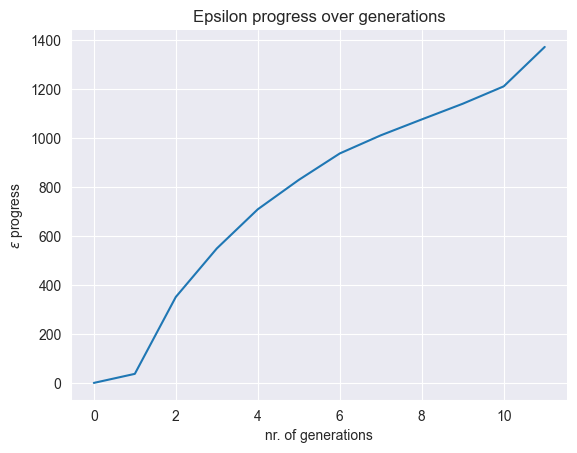

In [20]:
# Make a plot of the epsilon progress
fig, ax = plt.subplots(ncols=1)

ax.plot(convergence.epsilon_progress)
ax.set_xlabel("nr. of generations")
ax.set_ylabel(r"$\epsilon$ progress")
ax.set_title("Epsilon progress over generations")

sns.despine()
plt.show()

Visualising the epsilon progress over generations indicates that the algorithm has not yet stabilized. This indicates that the number of function evaluations (NFEs) has not been sufficient. Due to time constraints it has been chosen not to increase the number of NFEs and see the minimal convergence as a limitation.

**evt laten runnen met nog meer nfe, dan wel convergence? Daarnaast: toepassen van multiple seeds: the role of stochasticy**

- MOEAs use stochastics in crossover and mutation. Thus, the specific set of results will vary from one run of the algorithm to the next. Analogous to how you deal with stochasticitiy in discrete event models, it is best practice to run an MOEA multiple times using a different random seed. Next, you would combine the results from the different runs into a combined pareto approximate set.

Geen hypervolume omdat dan directe constraints aangeven. Weten niet precies wat dit dan moet zijn en zet harde constraints op het model.


##### Observatie, convergence gaat vrijwel gelijk

### 3. Parallel coordinate plot
Parallel coordinate plots show the tradeoffs of the 181 solutions that were found by the algorithm.

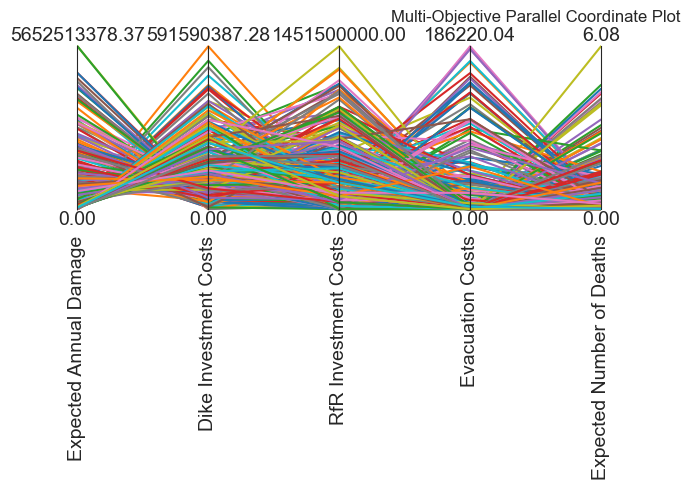

In [23]:
# Get objectives from results dataframe
data = results.loc[:, [o.name for o in dike_model.outcomes]]

# Define limits based on results dataframe
limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Expected Number of Deaths',
               'Dike Investment Costs', 'RfR Investment Costs',
               'Evacuation Costs']] = 0

# Set axes of parallel cooridinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(data)

# Set title
plt.title("Multi-Objective Parallel Coordinate Plot")
plt.show()

Plotting all 280 solutions results in a cluttered visualisation of the tradeoffs. It can be seen that pareto outcomes are found within different ranges. These ranges can be limited in order to come to a filtered set of solutions.

### 4. Filtering results to outcomes of interest
The outcomes of interest that are found by the MOEA algorithm significant ranges. More insight in these ranges can be created by looking into the descriptives of the objectives.

In [24]:
data = results.loc[:, [o.name for o in dike_model.outcomes]]
data.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
count,2.800000e+02,2.800000e+02,2.800000e+02,280.000000,280.000000
mean,1.144116e+09,1.387776e+08,3.238489e+08,22456.218760,0.746693
std,1.221971e+09,1.103149e+08,3.094572e+08,42186.126106,1.050623
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.389516e+08,5.531660e+07,6.140000e+07,0.000000,0.058255
50%,6.786319e+08,1.100847e+08,2.365000e+08,0.000000,0.280016
75%,1.911903e+09,1.817188e+08,4.953750e+08,24177.718299,1.024781
max,5.652513e+09,5.915904e+08,1.451500e+09,186220.037953,6.075804


As the most important goals is to minimize casualties, policies with less than 0.001 expected number of deaths are taken into consideration. Furthermore, the summation of RfR investment costs, Dike Investment Costs, and Evacuation costs are limited to 530 million euros.

The investment limitation is based on the total budget/spending on the Room for the River project. [Rijkswaterstaat](https://www.rijkswaterstaat.nl/water/waterbeheer/bescherming-tegen-het-water/maatregelen-om-overstromingen-te-voorkomen/ruimte-voor-de-rivieren#maatregelen) states that the total budget was 2.3 billion euros, divided over 39 different measures. Nine measures were excecuted on the IJssel river, resulting in an assumption of allocated budget of 530 million euros for the RfR investment costs.

## verhaal over 530 miljoen veranderen naar alleen rfr


In [25]:
# Add a new column to calculate total investment costs - deze momenteel niet meegenomen
results["Total Costs"] = results['Dike Investment Costs']+results['RfR Investment Costs']+results['Evacuation Costs']

In [27]:

#Gelimiteerd budget for RfR investment costs aangehouden
selected_results = results[(results['Expected Number of Deaths']  < 0.001) & (results['RfR Investment Costs'] < 530e6)]
selected_results

,Unnamed: 0,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Total Costs
1,1,0,0,0,0,0,0,1,0,0,...,2,10,3,3,3.682104e+05,5.915904e+08,151900000.0,29.444865,0.000065,7.434904e+08
8,8,0,1,0,0,1,0,1,1,1,...,2,10,4,0,0.000000e+00,3.917942e+08,515700000.0,0.000000,0.000000,9.074942e+08
63,63,0,0,0,0,0,0,0,0,0,...,3,9,3,0,1.071303e+06,4.397768e+08,242400000.0,85.590794,0.000189,6.821769e+08
64,64,1,0,0,0,0,0,1,0,1,...,2,10,0,0,0.000000e+00,3.934058e+08,267200000.0,0.000000,0.000000,6.606058e+08
69,69,0,0,0,0,0,0,1,0,1,...,5,10,0,0,0.000000e+00,4.853358e+08,182600000.0,0.000000,0.000000,6.679358e+08


In [30]:
#Write selected results and original outcomes under one scenario to a separate csv file __ controleren of dit daadwerkelijk wordt weergegeven
selected_results.to_csv('data/output_data/MOEA_selected_policies_with_outcomes.csv')


## Observatie: resultaat laat 5 verschillende policies zien die voldoen aan de voorwaarden!
> Hoeveel is hier gewensd??
The selection results in 5 different policies. The tradeoffs in these policies can be evaluated with a parallel coordinates plot.

### 5. Parallel coordinate plot of policies of interest

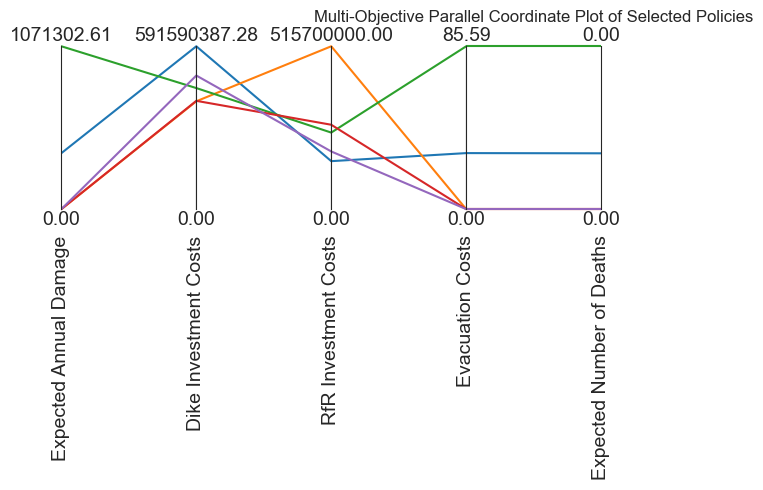

In [31]:
# Get objectives from results dataframe
data = selected_results.loc[:, [o.name for o in dike_model.outcomes]]

# Define limits based on results dataframe
limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Expected Number of Deaths',
               'Dike Investment Costs', 'RfR Investment Costs',
               'Evacuation Costs']] = 0

# Set axes of parallel cooridinate plots
paraxes = parcoords.ParallelAxes(limits)

# Plot data on axis
paraxes.plot(data)

# Set title
plt.title("Multi-Objective Parallel Coordinate Plot of Selected Policies")
plt.show()

The parallel coordinate plot indicates that there are still large trade-offs between the objectives. A first look indicates that it is possible to minimize expected annual damage, evacuation costs and expected number of deaths, but this comes at higher investment costs.

**full description of the defined policies should be added to appendix**

The policies found in the dataframe selected_results are saved to a CSV file.

In [27]:
policies = selected_results.drop(['Expected Annual Damage',
                                  'Dike Investment Costs',
                                  'RfR Investment Costs',
                                  'Evacuation Costs',
                                  'Expected Number of Deaths',
                                  'Total Costs', 'Unnamed: 0'], axis=1)

policies.to_csv('data/output_data/policies.csv')

### Next steps
The selected policies are evaluated under 5000 scenarios in the dike_model_optimization.py. The resulting csv files are evaluated in MORDM_3_uncertainty_analysis.